In [17]:
import numpy as np

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()

In [19]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [20]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

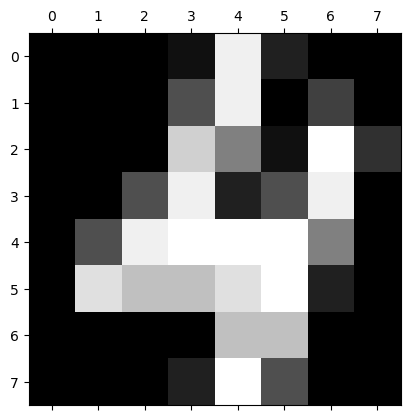

In [21]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1001])
plt.show()

# KNN

In [29]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [30]:
vectors = np.array(vectors)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [43]:
X_train.shape

(4800, 784)

In [44]:
X_test.shape

(1200, 784)

With library

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Crea un modelo KNN con k vecinos
knn = KNeighborsClassifier(n_neighbors=12)

# Realiza una validación cruzada de 5 pliegues para evaluar el rendimiento del modelo
scores = cross_val_score(knn, X_train, y_train, cv=7)

# Encuentra el valor de k que da el mejor rendimiento medio en la validación cruzada
best_k = np.argmax(scores) + 1

# Entrena el modelo KNN final con el valor óptimo de k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
print(best_k)
final_knn.fit(X_train, y_train)

3


KNeighborsClassifier(n_neighbors=3)

In [99]:
from sklearn.metrics import accuracy_score

# Predice las etiquetas de los datos de prueba
y_pred = final_knn.predict(X_test)

# Calcula el accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.925


In [100]:
from sklearn.metrics import accuracy_score

# Predice las etiquetas de los datos de entrenamiento y de prueba
y_train_pred = final_knn.predict(X_train)
y_test_pred = final_knn.predict(X_test)

# Calcula el accuracy del modelo en los conjuntos de entrenamiento y de prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy en el conjunto de entrenamiento:", train_accuracy)
print("Accuracy en el conjunto de prueba:", test_accuracy)


Accuracy en el conjunto de entrenamiento: 0.9554166666666667
Accuracy en el conjunto de prueba: 0.925


In [93]:
import numpy as np
from sklearn.model_selection import KFold

# Definir una función para calcular la distancia euclidiana entre dos puntos
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Definir una clase para el modelo KNN
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = [euclidean_distance(sample, x) for x in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
            y_pred.append(most_common_label)
        return np.array(y_pred)
    
    def optimus(self, X_train, y_train, max_k=10, n_folds=5):
        """
        Encuentra el valor óptimo de k para el modelo KNN mediante validación cruzada.
        
        Parámetros
        ----------
        X_train : array-like de forma (n_samples, n_features)
            Datos de entrenamiento.
        y_train : array-like de forma (n_samples,)
            Etiquetas de los datos de entrenamiento.
        max_k : int, opcional (default=10)
            El número máximo de vecinos a considerar.
        n_folds : int, opcional (default=5)
            El número de pliegues para la validación cruzada.
        """
        # Inicializa el modelo KNN
        self.knn = KNeighborsClassifier()
        
        # Lista para almacenar los valores de precisión para cada valor de k
        k_scores = []
        
        # Realiza la validación cruzada
        kf = KFold(n_splits=n_folds)
        for k in range(1, max_k+1):
            scores = []
            for train_idx, val_idx in kf.split(X_train):
                # Divide los datos en conjuntos de entrenamiento y de validación
                X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
                X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]
                
                # Entrena y evalúa el modelo KNN con el valor actual de k
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train_fold, y_train_fold)
                y_val_pred = knn.predict(X_val_fold)
                score = accuracy_score(y_val_fold, y_val_pred)
                scores.append(score)
                
            # Calcula la precisión media para el valor actual de k
            k_score = np.mean(scores)
            k_scores.append(k_score)
            
        # Encuentra el valor óptimo de k
        self.best_k = np.argmax(k_scores) + 1
        return np.argmax(k_scores) + 1

# Crear un modelo KNN con k=12
knn = KNN(k=12)
k_optimus= knn.optimus(X_train, y_train, max_k=50, n_folds=5)
knn = KNN(k=k_optimus)

# Entrenar el modelo KNN
knn.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = knn.predict(X_test)


In [94]:
# Predice las etiquetas de los datos de entrenamiento y de prueba
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calcula el accuracy del modelo en los conjuntos de entrenamiento y de prueba
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy en el conjunto de entrenamiento:", train_accuracy)
print("Accuracy en el conjunto de prueba:", test_accuracy)

Accuracy en el conjunto de entrenamiento: 1.0
Accuracy en el conjunto de prueba: 0.9325


## Prostate

In [2]:
import pandas as pd

In [3]:
prostate_data = pd.read_csv('prostate.csv')

In [17]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.
import pandas as pd
import numpy as np

# Convierte los datos a matrices NumPy
X = prostate_data.values[:, 0:8]
print(X.shape)
y = prostate_data.values[:, 8]
print(y.shape)

# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(97, 8)
(97,)


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

# Crea un modelo KNN con k vecinos
knn = KNeighborsClassifier(n_neighbors=12)

# Realiza una validación cruzada de 5 pliegues para evaluar el rendimiento del modelo
scores = cross_val_score(knn, X_train, y_train, cv=2)

# Encuentra el valor de k que da el mejor rendimiento medio en la validación cruzada
best_k = np.argmax(scores) + 1

# Entrena el modelo KNN final con el valor óptimo de k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
print(best_k)
final_knn.fit(X_train, y_train)

# Predecir las etiquetas de los datos de prueba
y_pred = final_knn.predict(X_test)

1


c:\Users\wdmoreno\Anaconda3\envs\proba\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


# Perceptron

In [15]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [16]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

IndentationError: expected an indented block (2579002564.py, line 10)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)